# Exercise 7: Data Visualisation 2

28/10/2022 (Author: Dr. Romana Rust and Sophia Kuhn)

17/11/2023 (Updated: Vera Balmer)

Course: Scientific Machine and Deep Learning for Design and Construction in Civil Engineering by M. A. Kraus, D. Griego and R. Rust

For Questions on this Exercise: vera.balmer@ai.ethz.ch

## Notebook Content
- 1.0 Introduction
    - 1.1 Import Libraries
    - 1.2 Iris Data Set
- 2.0 Plotly Library
    - 2.1 Scatter Matrix
    - 2.2 Parallel Coordinates Plot
- 3.0 Dimensionality Reduction
    - 3.1 PCA
    - 3.2 UMAP
    - 3.3 SOM
- 4.0 Interactive Data Visualisation

## 1.0 Introduction
### 1.1 Import Libraries

In [40]:
# import libraries
import pandas as pd
import numpy as np

# new library - Installation: conda install -c plotly plotly=5.11.0 
import plotly.express as px
import plotly.graph_objects as go

from sklearn.decomposition import PCA

# new library-Installation: conda install -c conda-forge umap-learn
from umap.umap_ import UMAP

#new library - Installation: pip install MiniSom
from minisom import MiniSom

# new library - Installation: conda install -c conda-forge jupyter-dash
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

from IPython.display import Image


### 1.2 Iris Data Set

In [2]:
csv_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
attribute_names = ["sepal length", "sepal width", "petal length", "petal width"]
target_names = ["class"]
data = pd.read_csv(csv_url, names=(attribute_names + target_names))
data.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

![Iris Data Set](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png) Just to understand the data set, here are pictures of the tree different flower species present in the data set. [[2]](http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html).

## 2.0 Plotly Library
The [plotly library](https://plotly.com/python/getting-started/#overview) is an interactive plotting library. 

Plotly enables Python users to construct interactive web-based visualizations that can be 
- displayed in Jupyter notebooks, 
- saved to standalone HTML files, 
- included in a  Python-built web applications using [Dash](https://plotly.com/dash/)

### 2.1 Scatter matrix

Simply view data in in respect to different dimensions.

Can we already detect something?


In [3]:
#fig = px.scatter_matrix(data, dimensions=attribute_names, width=1200, height=1200)

# we can also color the scatter matrix:
# fig = px.scatter_matrix(data, dimensions=attribute_names, color='petal length', width=1200, height=1200)
fig = px.scatter_matrix(data, dimensions=attribute_names, color=target_names[0], width=1200, height=1200)

fig.update_traces(diagonal_visible=False)
fig.show()

### 2.2 Parallel Coordinates Plot

Parallel Coordinates plots are a common way of visualizing and analysing high-dimensional datasets. The vertical (usually equally spaced) lines represent the n features (columns), and each n-dimensional point (row) is visualized with a polyline.
The features have no natural order so different arrangements can be of interest.



In [4]:
fig = px.parallel_coordinates(data, dimensions=attribute_names, color="petal width")
fig.show()

### Standardize the data

In [5]:
from sklearn.preprocessing import StandardScaler

# drop traget column
dataset = data.drop(target_names, axis=1)
# standardize
standard = StandardScaler()
X = pd.DataFrame(standard.fit_transform(dataset)).to_numpy()

# encode target categories
target = data[target_names[0]].astype("category").cat.codes.to_numpy() # convert categorical to int
label_names = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
dataset.head()

sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

## 3.0 Dimensionality reduction
### 3.1 PCA

The idea behind PCA is to project high dimensional data to a lower dimension by finding principal components which capture the directions with the highest variance while minimizing the reconstruction error.
PCA is a linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.


In [7]:
# apply PCA --> 3 components
pca = PCA(n_components=3)
pc = pca.fit_transform(X)
principal = pd.DataFrame(data=pc, columns=["pc 1", "pc 2", "pc 3"])
principal.head()


pc 1      pc 2      pc 3
0 -2.264542  0.505704 -0.121943
1 -2.086426 -0.655405 -0.227251
2 -2.367950 -0.318477  0.051480
3 -2.304197 -0.575368  0.098860
4 -2.388777  0.674767  0.021428

In [8]:
# # apply PCA --> 2 components
# pca = PCA(n_components=2)
# pc = pca.fit_transform(X)
# principal = pd.DataFrame(data=pc, columns=["pc 1", "pc 2"])
# principal.head()

#### Visual Validation

To validate our PCA analysis we plot the result and colour each point with respect to the corresponding (known) target. 

(Note: Often we don't know the true targets when applying unsupervised learning methods).


In [9]:
# Define plotting function

def custom_scatter(x, y, z=None):
    if z is not None:
        fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=5, color=target, showscale=True))])
    else:
        fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers', marker=dict(size=10, color=target, showscale=True)))
    fig.update_layout(margin=dict(l=50, r=50, b=50, t=50), width=900, height=600)                     
    fig.show()

##### 2D Plot

In [10]:
custom_scatter(pc[:, 0], pc[:, 1])

##### 3D Plot

In [11]:
custom_scatter(pc[:, 0], pc[:, 1], pc[:, 2])

### 3.2 UMAP
Uniform Manifold Approximation and Projection (UMAP) is a non linear dimensionality reduction algorithm. 

Step 1: Learning the manifold structure
- Finding nearest neigbors
- Construct a neigbour graph

Step 2: Finding a low-dimensional representation
- minimum distance
- minimizing the cost function


Important hyperparameter of UMAP [3]:
   - $n\_neighbors:$ the size of the local neighbourhood UMAP will look (default: 15)
   - $min\_dist:$ the minimum distance apart that points are allowed to be in the low dimensional representation (default: 0.1)
   - $n\_components:$ dimensionality of the reduced dimension space (default: 2)
   - $metric:$ applied distance metric (default:'euclidean')

In [12]:
# apply
reducer = UMAP(random_state=42, n_components=3)
embedding = reducer.fit_transform(X)


In [13]:
custom_scatter(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

In [14]:
custom_scatter(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

### 3.3 SOM

Self-Organising Map (SOM) can also be considers a type of manifold learning that handles non-linear dimensionality reduction. 
The SOM is a neural network with two layers: one input and one output layer.

![SOM Architecture](http://gorayni.github.io/assets/posts/som/som.png) Architecture of a SOM network In the SOM, the neurons or cells are usually placed in a regular grid. 

The neural network is competitively trained in such a way that each neuron maps data items that are the most similar to it. After training, the cells that are similar between each other are located next to each other, thus forming neighborhoods. This property preserves the topology of the original input space into the grid or lattice.[[4]](http://gorayni.github.io/blog/2014/10/08/som.html)


Steps:
1. Initialisation: Weights of neurons in the map layer are initialised.
2. Competitive process: Select one input sample and search the best matching unit among all neurons in n x m grid using distance measures.
3. Cooperative process: Find Best Matching Unit (BMU, the most similar neuron)
4. Update the BMU and neighbours' weights by shifting the values towards the input pattern.
Repeat 2-4 until maximum count of training iterations is reached.


 Source: [[5]](https://towardsdatascience.com/understanding-self-organising-map-neural-network-with-python-code-7a77f501e985)


Find the documentation of minisom [here](https://github.com/JustGlowing/minisom)


In [34]:
# Initialization and training
som_shape = (7, 7)
som = MiniSom(*som_shape, X.shape[1], sigma=0.5, neighborhood_function="gaussian")
som.pca_weights_init(X)
som.train(X, 300000, verbose=True)

 [ 300000 / 300000 ] 100% - 0:00:00 left 
 quantization error: 0.25653684719847


##### SOM distance map

To visualize the result of the training we can plot the distance map using a pseudocolor where the neurons of the maps are displayed as an array of cells and the color represents the (weights) distance from the neighbour neurons. On top of the pseudo color we can add markers that repesent the samples mapped in the specific cells:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

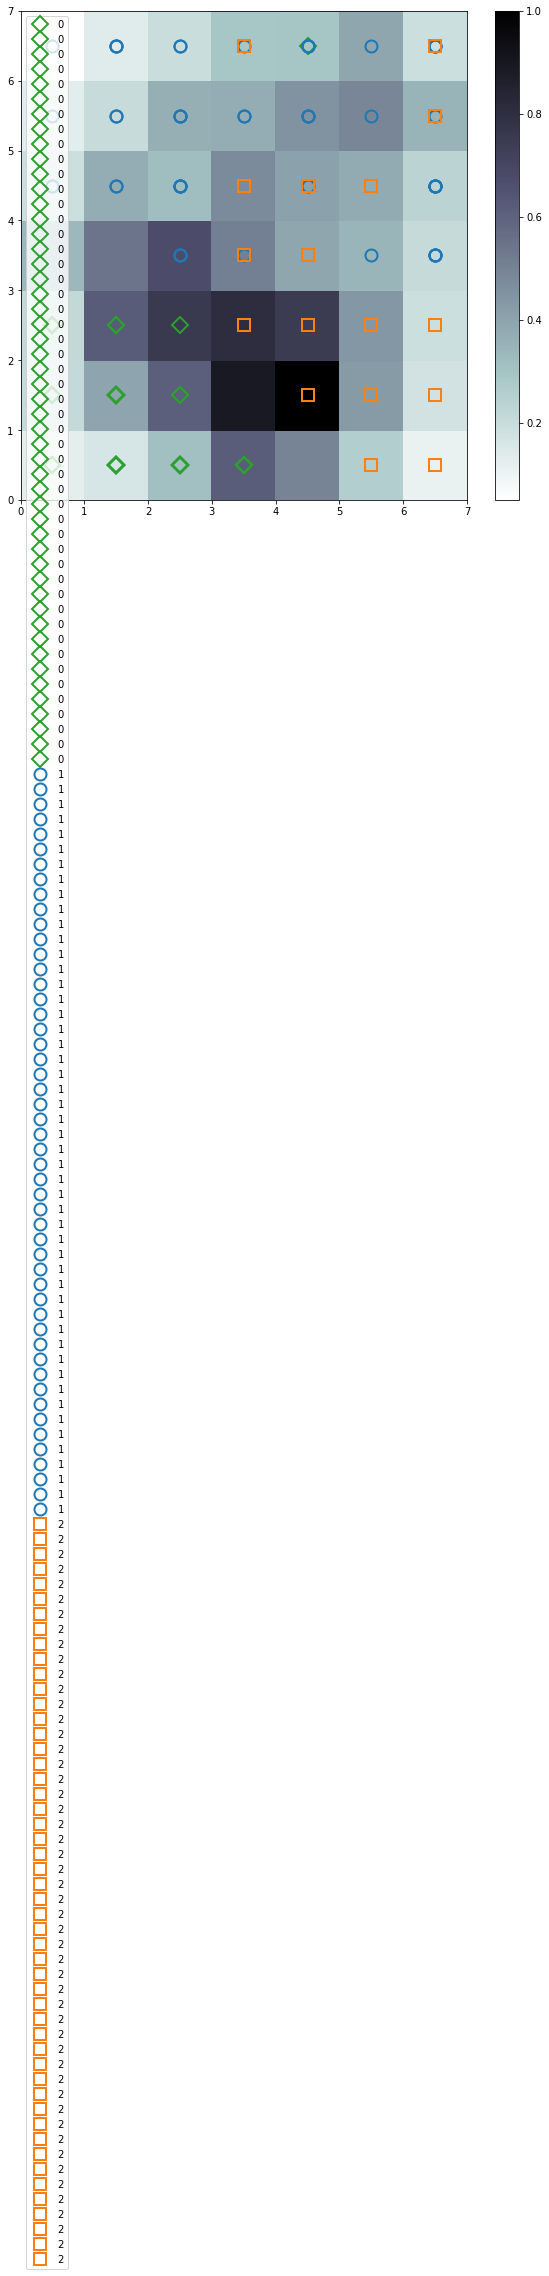

In [35]:
# https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

import matplotlib.pyplot as plt



plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X):
    w = som.winner(xx)  # getting the winner
    print(target)
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2, label=target[cnt])
plt.legend()
plt.show()

To have an overview of how the samples are distributed across the map a scatter chart can be used where each dot represents the coordinates of the winning neuron. A random offset is added to avoid overlaps between points within the same cell.

A different application of the SOM figure shown above, which is more intuitive, is presented in the image below for the accoustic panels of the Immersive Design Lab (IDL), created by Romana Rust.

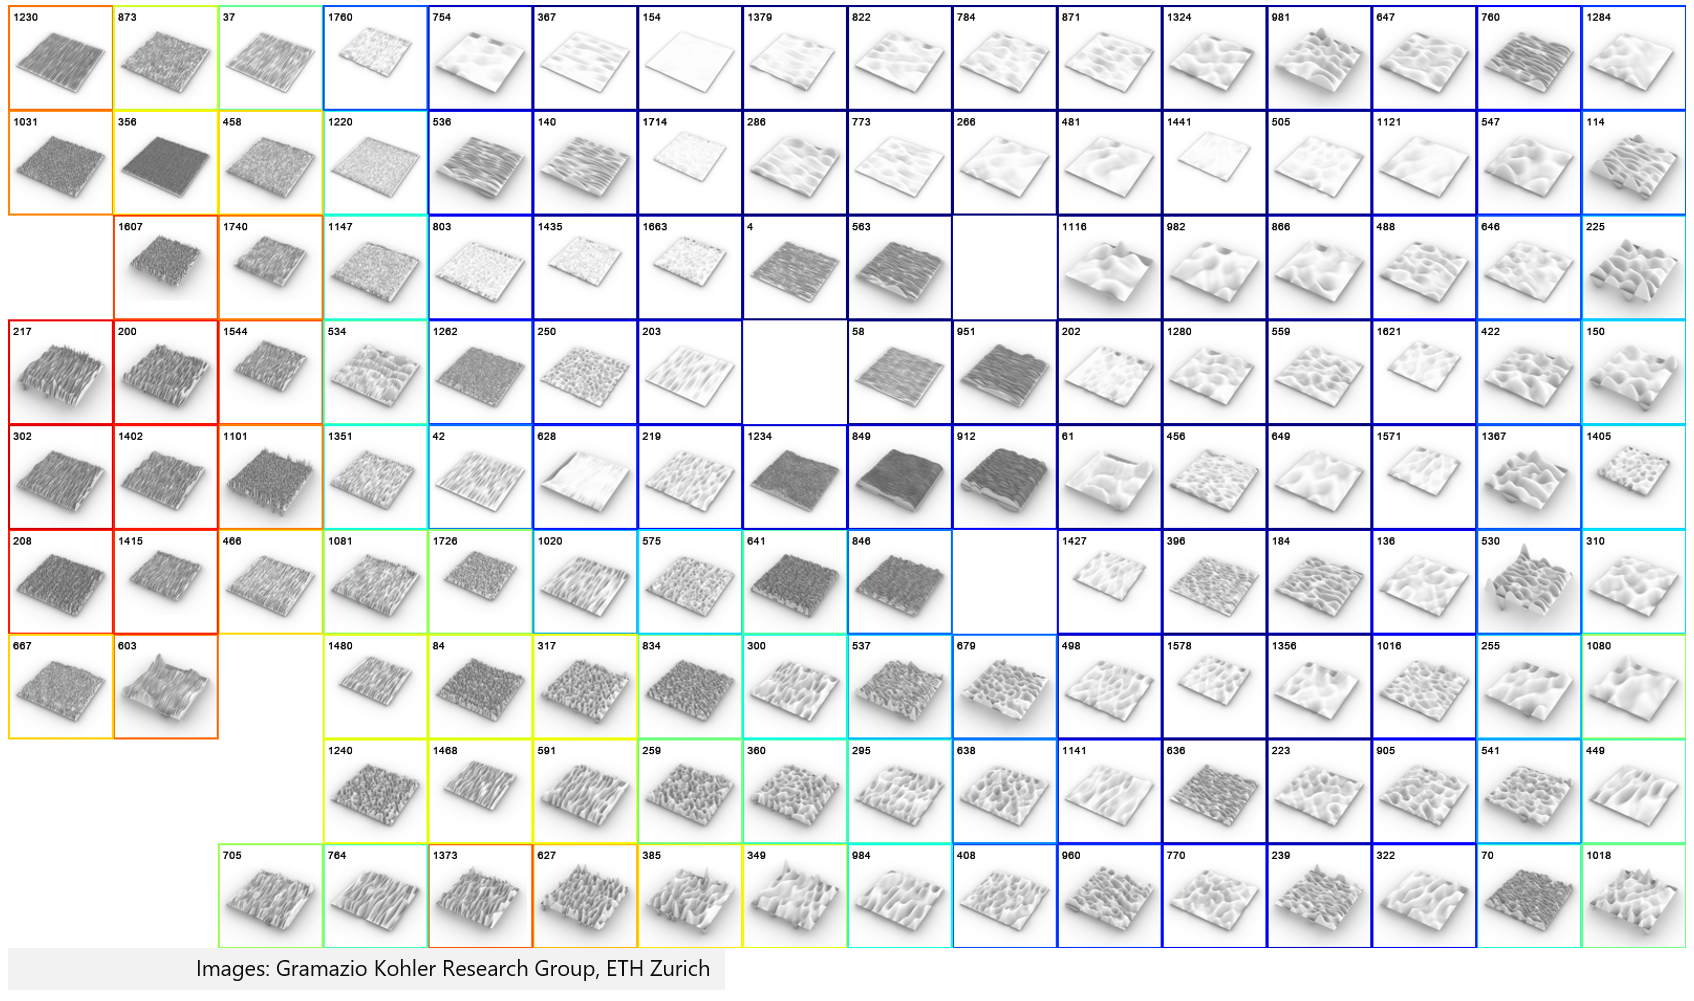

In [41]:
Image(filename='AccousticTiles_Romana.png')

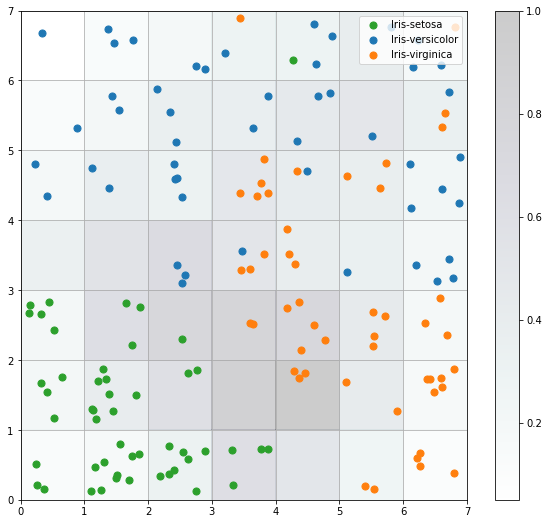

In [17]:
w_x, w_y = zip(*[som.winner(d) for d in X])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

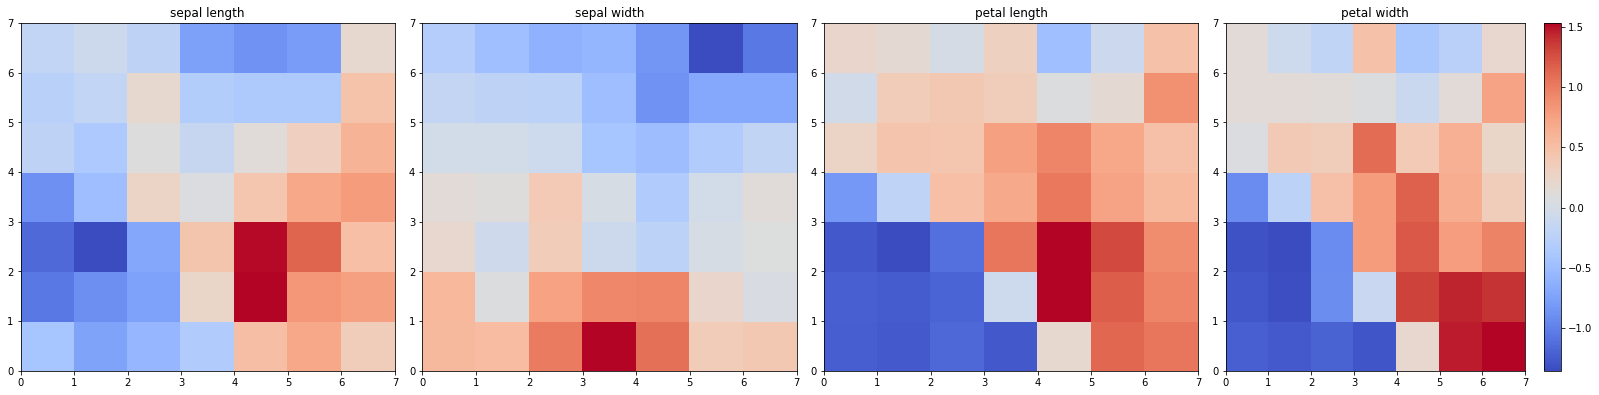

In [39]:
import matplotlib.pyplot as plt
W = som.get_weights()
size = 7
plt.figure(figsize=(size*4, size*3))

for i, f in enumerate(attribute_names):
    plt.subplot(4, 5, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(som_shape[0]+1))
    plt.yticks(np.arange(som_shape[1]+1))
plt.colorbar()
plt.tight_layout()
plt.show()

# 4. Interactive Data Visualisation

## JupyterDash Demo

In [19]:
# Load Data
df = px.data.tips()

# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )

df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [20]:
# Run app and display result inline in the notebook
app.run_server(mode='inline')


### References
[1] https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data \
[2] http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html \
[3] https://umap.scikit-tda.org/parameters.html \
[4] http://gorayni.github.io/blog/2014/10/08/som.html